In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plts
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import time
import cv2
# Put this when it's called
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Read student data
dev_dep = pd.read_csv("dev_split_Depression_AVEC2017.csv")
train_dep = pd.read_csv("train_split_Depression_AVEC2017.csv")
df_dep = pd.concat([dev_dep, train_dep], axis=0)
print (" data read successfully!")


 data read successfully!


In [2]:
dev_dep.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,302,0,4,1,1,1,0,1,0,1,0,0
1,307,0,4,0,0,1,0,1,0,2,0,0
2,331,0,8,1,1,1,1,1,1,1,1,1
3,335,1,12,0,1,1,3,2,3,1,1,0
4,346,1,23,0,2,3,3,3,3,3,3,3


In [59]:
# Further Exploration using .head()
df_dep.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,302,0,4,1,1,1,0,1,0,1,0,0
1,307,0,4,0,0,1,0,1,0,2,0,0
2,331,0,8,1,1,1,1,1,1,1,1,1
3,335,1,12,0,1,1,3,2,3,1,1,0
4,346,1,23,0,2,3,3,3,3,3,3,3


In [60]:
df_dep.shape

(142, 12)

Total number of Participant: 142
Number of features: 11
Graduation rate of the class: 29.58%


Text(0.5, 1.0, 'full dataset')

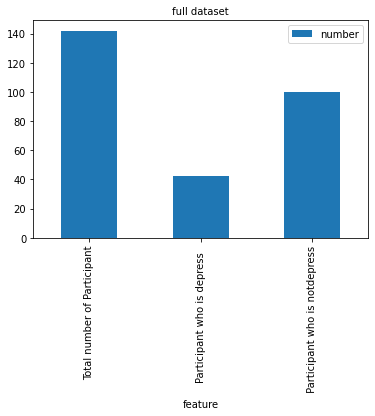

In [61]:
# TODO: Calculate number of students
n_Participant = df_dep.shape[0]

# TODO: Calculate number of features
n_features = df_dep.shape[1] - 1

# TODO: Calculate passing students
# Data filtering using .loc[rows, columns]
depressed = df_dep.loc[df_dep.PHQ8_Binary == 1, 'PHQ8_Binary']
n_depressed = depressed.shape[0]

# TODO: Calculate failing students
notdep = df_dep.loc[df_dep.PHQ8_Binary == 0, 'PHQ8_Binary']
n_notdep = notdep.shape[0]

#TODO: Calculate graduation rate
total = float(n_depressed  + n_notdep )
grad_rate = float(n_depressed * 100 / total)

# Print the results
print ("Total number of Participant: {}".format(n_Participant))
print ("Number of features: {}".format(n_features))
print ("Graduation rate of the class: {:.2f}%".format(grad_rate))

models_initial4 = pd.DataFrame({
 'feature' : ["Total number of Participant","Participant who is depress  "," Participant who is notdepress"],
 'number' : [n_Participant,n_depressed,n_notdep],}, columns = ['feature','number'])
models_initial4.sort_values(by='number', ascending=False)

ax = models_initial4.plot.bar(x='feature', y='number')
plt.title("full dataset", fontsize=10)

Number of female: 79
Number of male: 63
Number of men who depressed: 24
Number of Female who depressed: 18
Number of men who NOTdepressed: 39
Number of Female who NOTdepressed: 61


Text(0.5, 1.0, 'full dataset')

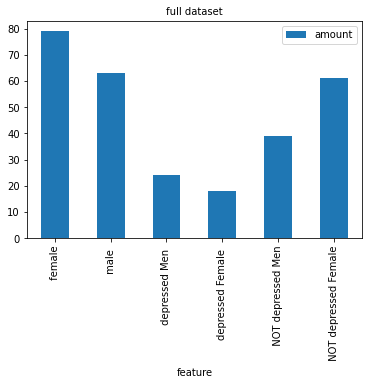

In [62]:
genderF= df_dep.loc[df_dep.Gender==1,'Gender']
gender1=genderF.shape[0]
genderM=df_dep.loc[df_dep.Gender ==0,'Gender']
gender0=genderM.shape[0]
Men = df_dep.loc[((df_dep['PHQ8_Binary'] == 1) & (df_dep['Gender']==0))]
M=Men.shape[0]
FEMALE = df_dep.loc[(df_dep['PHQ8_Binary'] == 1) & (df_dep['Gender']==1)]
F=FEMALE.shape[0]
Men0 = df_dep.loc[((df_dep['PHQ8_Binary'] == 0) & (df_dep['Gender']==0))]
M0=Men0.shape[0]
FEMALE0 = df_dep.loc[(df_dep['PHQ8_Binary'] == 0) & (df_dep['Gender']==1)]
F0=FEMALE0.shape[0]
print ("Number of female: {}".format(gender1))
print ("Number of male: {}".format(gender0))
print ("Number of men who depressed: {}".format(M))
print ("Number of Female who depressed: {}".format(F))
print ("Number of men who NOTdepressed: {}".format(M0))
print ("Number of Female who NOTdepressed: {}".format(F0))
#df1['Gender'] = df2['PHQ8_Binary']

#df1['mental'] = np.where(df2['PHQ8_Binary'] == 1, 'depressed', 'not depressed')  #create new column in df1
models_initial5 = pd.DataFrame({
 'feature' : [" female"," male "," depressed Men ","depressed Female "
              ,"  NOT depressed Men"," NOT depressed Female"],
 'amount' : [gender1,gender0,M,F,M0,F0],}, columns = ['feature','amount'])
models_initial5.sort_values(by='amount', ascending=False)
ax = models_initial5.plot.bar(x='feature', y='amount')
plt.title("full dataset", fontsize=10)

Number of female: 16
Number of male: 19
Number of men who depressed: 7
Number of Female who depressed: 5
Number of men who NOTdepressed: 12
Number of Female who NOTdepressed: 11


Text(0.5, 1.0, 'development dataset ')

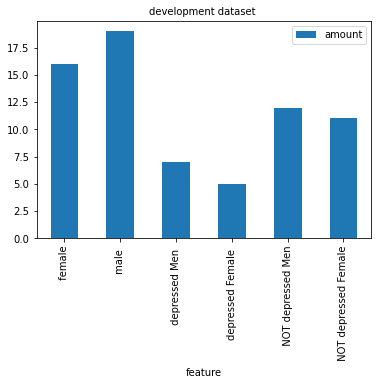

In [63]:
genderFdev= dev_dep.loc[dev_dep.Gender==1,'Gender']
gender1dev=genderFdev.shape[0]
genderMdev=dev_dep.loc[dev_dep.Gender ==0,'Gender']
gender0dev=genderMdev.shape[0]
Mendev = dev_dep.loc[((dev_dep['PHQ8_Binary'] == 1) & (dev_dep['Gender']==0))]
Mdev=Mendev.shape[0]
FEMALEdev = dev_dep.loc[(dev_dep['PHQ8_Binary'] == 1) & (dev_dep['Gender']==1)]
Fdev=FEMALEdev.shape[0]
Men0dev = dev_dep.loc[((dev_dep['PHQ8_Binary'] == 0) & (dev_dep['Gender']==0))]
M0dev=Men0dev.shape[0]
FEMALE0dev = dev_dep.loc[(dev_dep['PHQ8_Binary'] == 0) & (dev_dep['Gender']==1)]
F0dev=FEMALE0dev.shape[0]
print ("Number of female: {}".format(gender1dev))
print ("Number of male: {}".format(gender0dev))
print ("Number of men who depressed: {}".format(Mdev))
print ("Number of Female who depressed: {}".format(Fdev))
print ("Number of men who NOTdepressed: {}".format(M0dev))
print ("Number of Female who NOTdepressed: {}".format(F0dev))
#df1['Gender'] = df2['PHQ8_Binary']

#df1['mental'] = np.where(df2['PHQ8_Binary'] == 1, 'depressed', 'not depressed')  #create new column in df1
models_initial5Dev = pd.DataFrame({
 'feature' : [" female"," male "," depressed Men ","depressed Female "
              ,"  NOT depressed Men"," NOT depressed Female"],
 'amount' : [gender1dev,gender0dev,Mdev,Fdev,M0dev,F0dev],}, columns = ['feature','amount'])
models_initial5Dev.sort_values(by='amount', ascending=False)
ax = models_initial5Dev.plot.bar(x='feature', y='amount')
plt.title("development dataset ", fontsize=10)


Number of female: 63
Number of male: 44
Number of men who depressed: 17
Number of Female who depressed: 13
Number of men who NOTdepressed: 27
Number of Female who NOTdepressed: 50


Text(0.5, 1.0, 'train dataset ')

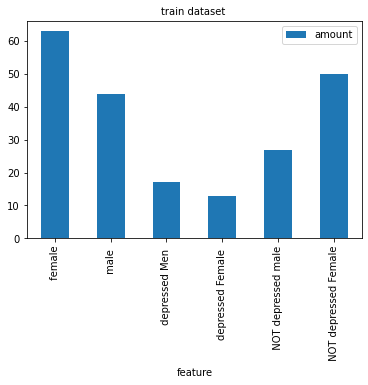

In [64]:
genderFtrain= train_dep.loc[train_dep.Gender==1,'Gender']
gender1train=genderFtrain.shape[0]
genderMtrain=train_dep.loc[train_dep.Gender ==0,'Gender']
gender0train=genderMtrain.shape[0]
Mentrain= train_dep.loc[((train_dep['PHQ8_Binary'] == 1) & (train_dep['Gender']==0))]
Mtrain=Mentrain.shape[0]
FEMALEtrain = train_dep.loc[(train_dep['PHQ8_Binary'] == 1) & (train_dep['Gender']==1)]
Ftrain=FEMALEtrain.shape[0]
Men0train = train_dep.loc[((train_dep['PHQ8_Binary'] == 0) & (train_dep['Gender']==0))]
M0train=Men0train.shape[0]
FEMALE0train = train_dep.loc[(train_dep['PHQ8_Binary'] == 0) & (train_dep['Gender']==1)]
F0train=FEMALE0train.shape[0]
print ("Number of female: {}".format(gender1train))
print ("Number of male: {}".format(gender0train))
print ("Number of men who depressed: {}".format(Mtrain))
print ("Number of Female who depressed: {}".format(Ftrain))
print ("Number of men who NOTdepressed: {}".format(M0train))
print ("Number of Female who NOTdepressed: {}".format(F0train))
#df1['Gender'] = df2['PHQ8_Binary']

#df1['mental'] = np.where(df2['PHQ8_Binary'] == 1, 'depressed', 'not depressed')  #create new column in df1
models_initial5train = pd.DataFrame({
 'feature' : [" female"," male "," depressed Men ","depressed Female "
              ,"  NOT depressed male"," NOT depressed Female"],
 'amount' : [gender1train,gender0train,Mtrain,Ftrain,M0train,F0train],}, columns = ['feature','amount'])
models_initial5train.sort_values(by='amount', ascending=False)
ax = models_initial5train.plot.bar(x='feature', y='amount',align='center')
plt.title("train dataset ", fontsize=10)

In [66]:
#df_dep.columns

In [67]:
#df_dep.iloc[:,[1]]
#array = df_dep.values
#TA = array[:,1]
#df_dep.columns.values[1]

In [68]:
#df_dep.loc[:, dev_dep.columns != 'PHQ8_Binary']

In [69]:
#Extract feature columns
# As seen above, we're getting all the columns except "passed" here but we're converting it to a list
feature_cols = list(df_dep.loc[:, df_dep.columns != 'PHQ8_Binary'])
#A=df_dep.loc[df_dep.PHQ8_Binary == 1, 'PHQ8_Binary'].values
target_col = df_dep.columns.values[1]
# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = df_dep[feature_cols]
y_all = df_dep[target_col]
# Show the feature information by printing the first five rows
#print ("\nFeature values:")


Feature columns:
['Participant_ID', 'PHQ8_Score', 'Gender', 'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired', 'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving']

Target column: PHQ8_Binary


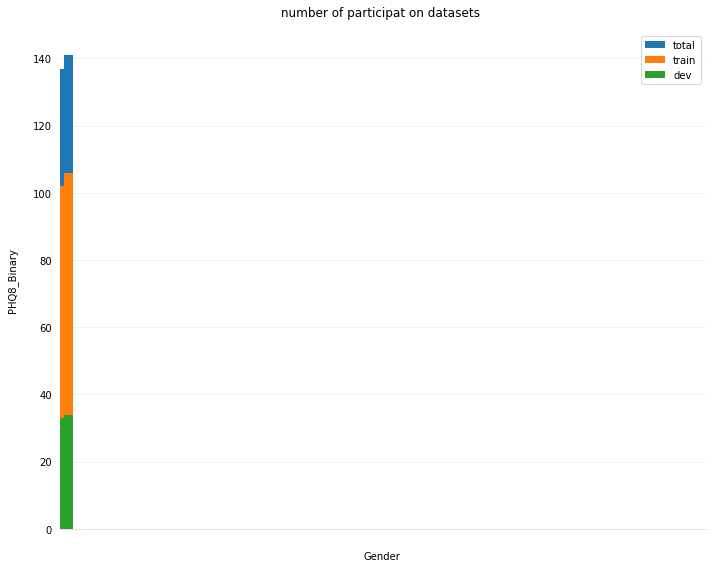

In [65]:
# Use Seaborn's context settings to make fonts larger.
#import seaborn as sns
#sns.set_context('talk')
data1 = df_dep.Gender.replace(to_replace=[0, 1], value=['male','female'])
data2 = train_dep.Gender.replace(to_replace=[0, 1], value=['male','female'])
data3 = dev_dep.Gender.replace(to_replace=[0, 1], value=['male','female'])
# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(10,8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
o = np.arange(len(data1))
p= np.arange(len(data2))
Q = np.arange(len(data3))

# Define bar width. We need this to offset the second bar.
bar_width = 2

b1 = ax.bar(data1,o, width=bar_width, label='total')
# Same thing, but offet the x.
b2 = ax.bar(data2,p, width=bar_width, label='train')
b3 = ax.bar(data3,Q, width=bar_width,label='dev')
# Define bar width. We need this to offset the second bar.
bar_width = 10

# Fix the x-axes.
ax.set_xticks(o + bar_width / 2)
ax.set_xticks(p + bar_width / 2)
ax.set_xticks(Q + bar_width / 2)


# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Gender', labelpad=15)
ax.set_ylabel('PHQ8_Binary', labelpad=15)
ax.set_title(' number of participat on datasets  ', pad=15)

fig.tight_layout()

In [70]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is non-numeric, replace all yes/no values with 1/0
      #  if col_data.dtype == object:
           # col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)

        # Collect the revised columns
        output = output.join(col_data)

    return output

X_all1 = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all1.columns), list(X_all1.columns)))

Processed feature columns (11 total features):
['Participant_ID', 'PHQ8_Score', 'Gender', 'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired', 'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving']


In [71]:
# For initial train/test split, we can obtain stratification by simply using stratify = y_all:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify = y_all, test_size=0.3, random_state=0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 99 samples.
Testing set has 43 samples.


In [72]:
# To double check stratification
print (np.mean(y_train == 0))
print (np.mean(y_test == 0))

0.7070707070707071
0.6976744186046512


In [73]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''

    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()

    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))


def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()

    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label=1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''

    # Indicate the classifier and the training set size
    print ("")
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifier(clf, X_train, y_train)

    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))
    

In [74]:
start = time()
y_pred = clf.predict(features)
end = time()
clf_A = GaussianNB()
clf_B = LogisticRegression(random_state=42)
clf_C = SVC(random_state=42)

# TODO: Set up the training set sizes
X_train_100 = X_train.iloc[:30,:]
y_train_100 = y_train.iloc[:30]

X_train_200 = X_train.iloc[:50, :]
y_train_200 = y_train.iloc[:50]

X_train_300 = X_train.iloc[:90, :]
y_train_300 = y_train.iloc[:90]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)

for clf in [clf_A, clf_B, clf_C]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    for n in [30, 50, 90]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)

TypeError: 'module' object is not callable

In [75]:
rfR = RandomForestClassifier(random_state=0)
rfR.fit(X_train, y_train)
y_predR = rfR.predict(X_test)
print("random forest:")
print(classification_report(y_test, y_predR))
print("LogisticRegression:")
rfL = LogisticRegression(random_state=0)
rfL.fit(X_train, y_train)
y_predL = rfL.predict(X_test)
print(classification_report(y_test, y_predL))
print("DecisionTreeClassifier:")
rfD = DecisionTreeClassifier(random_state=0)
rfD.fit(X_train, y_train)
y_predD = rfD.predict(X_test)
print(classification_report(y_test, y_predD))
print("KNeighborsClassifier:")
rfknn = KNeighborsClassifier()
rfknn.fit(X_train, y_train)
y_predknn = rfknn.predict(X_test)
print(classification_report(y_test, y_predD))

random forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.93      1.00      0.96        13

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43

LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.86      0.92      0.89        13

    accuracy                           0.93        43
   macro avg       0.91      0.93      0.92        43
weighted avg       0.93      0.93      0.93        43

DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.93      1.00      0.96        13

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [77]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [78]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

In [79]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [80]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\met

In [81]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [82]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [83]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [84]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc,dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Decision Tree,0.003672,0.013856,1.000000,1.000000,1.000000,1.000000,1.000000
5,Random Forest,0.275675,0.049667,1.000000,1.000000,1.000000,1.000000,1.000000
0,Logistic Regression,0.044536,0.013448,0.970000,0.975000,0.959524,0.968996,0.995238
7,Bayes,0.010169,0.022555,0.940000,0.930000,0.957143,0.942152,1.000000
3,Linear Discriminant Analysis,0.005883,0.018000,0.938889,0.963889,0.891667,0.931657,0.980952
6,K-Nearest Neighbors,0.009537,0.030569,0.878889,0.897659,0.829762,0.870074,0.919048
4,Quadratic Discriminant Analysis,0.005197,0.015539,0.800000,0.646528,0.666667,0.730069,0.961905
2,Support Vector Machine,0.007706,0.015810,0.707778,0.353889,0.500000,0.586879,0.990476


In [85]:
# Performance
#p_score = lambda model, score: print('Performance of the %s model is %0.2f%%' % (model, score * 100))

# Classifiers
#name= [
    #"Logistic Regression", "Logistic Regression with Polynomial Hypotheses",
    #"Linear SVM", "RBF SVM", "Neural Net",
#]

#classifiers = [
   # LogisticRegression(),
    #make_pipeline(PolynomialFeatures(3), LogisticRegression()),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #MLPClassifier(alpha=1),
#]#

In [49]:
#models = []
#trained_classifiers = []
#for name, clf in zip(name, classifiers):
    #scores = []
    #for train_indices, test_indices in cv2.split(X):
        #clf.fit(X_train, y_train)
        #scores.append( clf.score(X_test, y_test.ravel()) )
    
    #min_score = min(scores)
    #max_score = max(scores)
    #avg_score = sum(scores) / len(scores)
    
    #trained_classifiers.append(clf)
    #models.append((name, min_score, max_score, avg_score))
    
#fin_models = pd.DataFrame(models, columns = ['Name', 'Min Score', 'Max Score', 'Mean Score'])
#fin_models.sort_values(['Max Score']).head()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


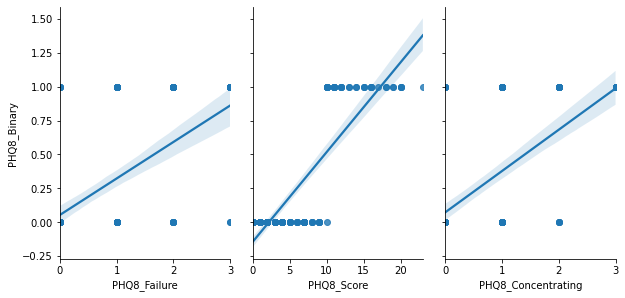

In [50]:
sns.pairplot(df_dep, x_vars=['PHQ8_Failure', 'PHQ8_Score', 'PHQ8_Concentrating'], y_vars='PHQ8_Binary', size=4, aspect=0.7, kind='reg')

In [86]:
clf_1 = DecisionTreeClassifier()
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 7
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()

def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()

In [92]:
dev_dep.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

TRAIN_split_Depression_AVEC2017
train_split_Depression_AVEC2017
random forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

LogisticRegression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.83      0.91         6

    accuracy                           0.95        22
   macro avg       0.97      0.92      0.94        22
weighted avg       0.96      0.95      0.95        22

DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         6

    accuracy                           1.00        22
   ma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

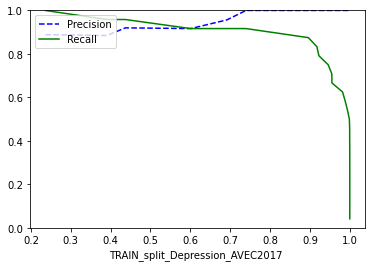

In [89]:

print("TRAIN_split_Depression_AVEC2017")
# As seen above, we're getting all the columns except "passed" here but we're converting it to a list
feature_colsT = list(train_dep.loc[:, train_dep.columns != 'PHQ8_Binary'])
target_colT = train_dep.columns.values[1]
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_allT = train_dep[feature_colsT]
y_allT = train_dep[target_colT]
# For initial train/test split, we can obtain stratification by simply using stratify = y_all:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X_allT, y_allT, stratify = y_allT, test_size=0.2, random_state=0)
print("train_split_Depression_AVEC2017")
rfTRA = RandomForestClassifier(random_state=0)
rfTRA.fit(X_trainT, y_trainT)
y_predTRA = rfTRA.predict(X_testT)
print("random forest:")
print(classification_report(y_testT, y_predTRA))
print("LogisticRegression:")
rfTRA = LogisticRegression(random_state=0)
rfTRA.fit(X_trainT, y_trainT)
y_predTRA = rfTRA.predict(X_testT)
print(classification_report(y_testT,y_predTRA))
print("DecisionTreeClassifier:")
rfTRA = DecisionTreeClassifier(random_state=0)
rfTRA.fit(X_trainT, y_trainT)
y_predTRA = rfTRA.predict(X_testT)
print(classification_report(y_testT,y_predTRA))


from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
# Logistic Regression
clf_logreg = LogisticRegression()
# fit model
clf_logreg.fit(X_trainT, y_trainT)
# Make class predictions for the validation set.
y_pred_class_logreg = cross_val_predict(clf_logreg, X_trainT, y_trainT)
# predicted probabilities for class 1, probabilities of positive class
y_pred_prob_logreg = cross_val_predict(clf_logreg, X_trainT, y_trainT, method="predict_proba")
y_pred_prob_logreg_class1 = y_pred_prob_logreg[:, 1]
precisions, recalls, train_dep = precision_recall_curve(y_trainT, y_pred_prob_logreg_class1)
def plot_precision_recall_vs_train_dep(precisions, recalls, train_dep):
    plt.plot(train_dep, precisions[:-1], "b--", label="Precision")
    plt.plot(train_dep, recalls[:-1], "g-", label="Recall")
    plt.xlabel("TRAIN_split_Depression_AVEC2017 ")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_train_dep(precisions, recalls,train_dep)
plt.show()






In [132]:
#print("TOTAL")
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# make predictions on the testing set
y_pred = linreg.predict(X_test)
# compute the RMSE of our predictions
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test,y_pred)
Mse = metrics.mean_squared_error(y_test,y_pred)
#print("dev_split_Depression_AVEC2017")
linregDEV = LinearRegression()
linregDEV.fit(X_trainV, y_trainV)
# make predictions on the testing set
y_predV = linregDEV.predict(X_testV)
# compute the RMSE of our predictions
RMSEDEV = np.sqrt(metrics.mean_squared_error(y_testV, y_predV))
MAEDEV = metrics.mean_absolute_error(y_testV,y_predV)
MseDEV = metrics.mean_squared_error(y_testV,y_predV)
print(MseDEV)
#print("TRAIN_split_Depression_AVEC2017")
linregTRA = LinearRegression()
linregTRA.fit(X_trainT, y_trainT)
# make predictions on the testing set
y_predT = linregTRA.predict(X_testT)
# compute the RMSE of our predictions
RMSETRA = np.sqrt(metrics.mean_squared_error(y_testT, y_predT))
MAETRA = metrics.mean_absolute_error(y_testT,y_predT)
MseTRA = metrics.mean_squared_error(y_testT,y_predT)
print(MseTRA)


0.08991138064902095
0.0686333111793957


In [126]:
models_initial2 = pd.DataFrame({
 'MODEL' : ["TOTAL dataset","DEV_SPLIT","TRAIN_SPLIT"],
 'RMSE' : [RMSE,RMSEDEV,RMSETRA],
 'MAE'  : [MAE,MAEDEV,MAETRA],
 'Mse'  : [Mse,MseDEV,MseTRA], }, columns = ['MODEL','RMSE', 'MAE', 'Mse'])
models_initial2.sort_values(by='MODEL', ascending=False)
    

,MODEL,RMSE,MAE,Mse
2,TRAIN_SPLIT,0.261980,0.204661,0.068633
0,TOTAL dataset,0.277068,0.224423,0.076766
1,DEV_SPLIT,0.299852,0.250186,0.089911


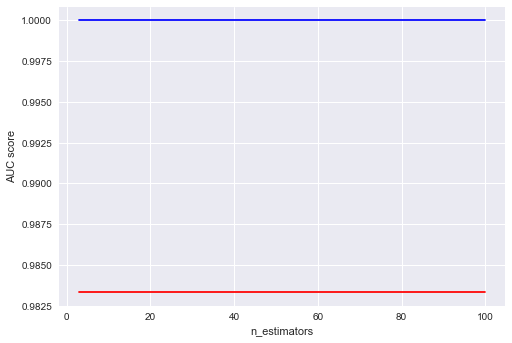

In [127]:
#This means that choosing a large number of estimators in 
#a random forest model is not the best idea. Although it 
#will not degrade the model, it can save you the computational complexity 
#and prevent the use of a fire extinguisher on your CPU!
from sklearn.metrics import roc_curve, auc
n_estimators = [ 3, 4, 8, 16, 100]
train_results = []
test_results = []
for estimator in n_estimators: 
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   y_pred = rf.predict(X_test)
   roc_curve(y_test, y_pred)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1= plt.plot(n_estimators, train_results,'b', label="Train AUC")
line2= plt.plot(n_estimators, test_results,'r', label="Test AUC")

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

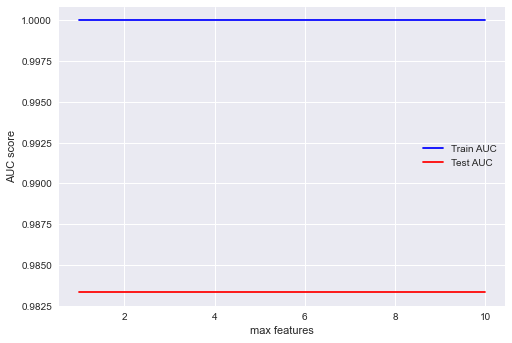

In [102]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1= plt.plot(max_features, train_results, 'b', label="Train AUC")
line2= plt.plot(max_features, test_results,'r', label="Test AUC")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()


In [101]:
#Extract feature columns
# As seen above, we're getting all the columns except "passed" here but we're converting it to a list
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
feature_colsV =list(dev_dep.loc[:, dev_dep.columns != 'PHQ8_Binary'])
target_colV = dev_dep.columns.values[1]
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_allV = dev_dep[feature_colsV]
y_allV = dev_dep[target_colV]
# For initial train/test split, we can obtain stratification by simply using stratify = y_all:
X_trainV, X_testV, y_trainV, y_testV = train_test_split(X_allV, y_allV, stratify = y_allV, test_size=0.2, random_state=0)
print("dev_split_Depression_AVEC2017")
rfDEVR = RandomForestClassifier(random_state=0)
rfDEVR.fit(X_trainV, y_trainV)
y_predDEVR = rfDEVR.predict(X_testV)
print("random forest:")
print(classification_report(y_testV, y_predDEVR))
print("LogisticRegression:")
rfDEVL = LogisticRegression(random_state=0)
rfDEVL.fit(X_trainV, y_trainV)
y_predDEVL = rfDEVL.predict(X_testV)
print(classification_report(y_testV,y_predDEVL))
print("DecisionTreeClassifier:")
rfDEVD = DecisionTreeClassifier(random_state=0)
rfDEVD.fit(X_trainV, y_trainV)
y_predDEVD = rfDEVD.predict(X_testV)
print(classification_report(y_testV,y_predDEVD))
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
# Logistic Regression
clf_logreg = LogisticRegression()
# fit model
clf_logreg.fit(X_trainV, y_trainV)
# Make class predictions for the validation set.
y_pred_class_logreg = cross_val_predict(clf_logreg, X_trainV, y_trainV)
# predicted probabilities for class 1, probabilities of positive class
y_pred_prob_logreg = cross_val_predict(clf_logreg, X_trainV, y_trainV, method="predict_proba")
y_pred_prob_logreg_classV = y_pred_prob_logreg[:, 1]
precisions, recalls,dev_dep = precision_recall_curve(y_trainV, y_pred_prob_logreg_classV)
def plot_precision_recall_vs_dev_dep(precisions,recalls,dev_dep):
    plt.plot(dev_dep, precisions[:-1], "b--", label="Precision")
    plt.plot(dev_dep, recalls[:-1], "g-", label="Recall")
    plt.xlabel("dev_split_Depression_AVEC2017 ")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_dev_dep(precisions,recalls,dev_dep)
plt.show()
fpr,tpr,thresholds = roc_curve(y_testV,y_predDEVL[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1],linestyle='_ _')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1-specifi')
plt.xlabel('sensit')
plt.ylim([0, 1])
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'loc'